In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
positive = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    )
)).T

In [3]:
negative = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=-1.0, scale=0.5, size=200),
         np.random.normal(loc=1.0, scale=0.5, size=200))
    )
)).T

In [4]:
data = np.vstack((positive, negative))
labels = np.vstack(([[1, 0]]*400, [[0, 1]]*400));

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal(),),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [8]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metric=['accuracy']);

model.fit(data, labels, epochs=100)

Train on 800 samples
Epoch 1/100
800/800 [==============================] - 0s 429us/sample - loss: 0.1673
Epoch 2/100
800/800 [==============================] - 0s 88us/sample - loss: 0.1665
Epoch 3/100
800/800 [==============================] - 0s 90us/sample - loss: 0.1658
Epoch 4/100
800/800 [==============================] - 0s 87us/sample - loss: 0.1653
Epoch 5/100
800/800 [==============================] - 0s 89us/sample - loss: 0.1646
Epoch 6/100
800/800 [==============================] - 0s 78us/sample - loss: 0.1642
Epoch 7/100
800/800 [==============================] - 0s 65us/sample - loss: 0.1637
Epoch 8/100
800/800 [==============================] - 0s 62us/sample - loss: 0.1631
Epoch 9/100
800/800 [==============================] - 0s 63us/sample - loss: 0.1626
Epoch 10/100
800/800 [==============================] - 0s 63us/sample - loss: 0.1623
Epoch 11/100
800/800 [==============================] - 0s 82us/sample - loss: 0.1618
Epoch 12/100
800/800 [===================

800/800 [==============================] - 0s 57us/sample - loss: 0.1488
Epoch 96/100
800/800 [==============================] - 0s 58us/sample - loss: 0.1489
Epoch 97/100
800/800 [==============================] - 0s 53us/sample - loss: 0.1489
Epoch 98/100
800/800 [==============================] - 0s 57us/sample - loss: 0.1489
Epoch 99/100
800/800 [==============================] - 0s 51us/sample - loss: 0.1488
Epoch 100/100
800/800 [==============================] - 0s 46us/sample - loss: 0.1488


In [6]:
predicted = model.predict(data)

same = 0
for i in range(len(labels)):
    same += np.argmax(predicted[i]) == np.argmax(labels[i])

print("Accuracy: ", float(same)/float(len(labels)))

Accuracy:  0.94875


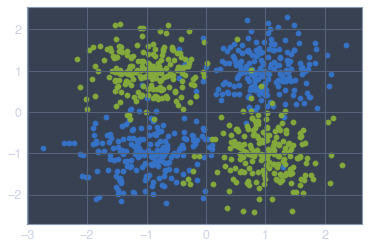

In [7]:
plt.scatter(positive[:,0], positive[:, 1])
plt.scatter(negative[:,0], negative[:, 1])
plt.show()